In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots
from sklearn.model_selection import train_test_split
import tensorflow as tf

# others
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
# others
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [5]:
import string, re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.utils import text_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, TextVectorization, GlobalAveragePooling1D

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Data Ingestion

In [8]:
#Load the datasets

reviews_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      60000 non-null  int64 
 1   Review  60000 non-null  object
 2   Rating  60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [10]:
reviews_df.head()

,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [11]:
reviews_df['Rating'].unique()

array([5, 3, 1, 4, 2])

In [12]:
reviews_df.shape

(60000, 3)

In [13]:
def sentiment_class(x):
  if x in (1,2):
    return 'negative'
  elif x == 3:
    return 'neutral'
  else:
    return 'positive'

reviews_df['Sentiment'] = reviews_df['Rating'].apply(sentiment_class)
reviews_df['Sentiment'].value_counts()

,count
Sentiment,
positive,38029
negative,20292
neutral,1679


In [14]:
#Example of neutral review
reviews_df[reviews_df.Rating== 3].iloc[76]['Review']

'The product and ordering were as expected, good. The delivery service provided by parcel force was awful.\nMay be the review should be about parcel force but unfortunately I am reviewing the whole experience. Parcel force delivered 2 days late on a next day and lied, first time said there was no one in when we have serviced offices with a reception, 2nd time said the address was inaccurate which is funny how they apparently found it the 1st & 3rd time. Wex are great but I would consider using another company next time as their appointed courier is unreliable.'

In [15]:
#Drop review if sentiment is netural
reviews_df = reviews_df[reviews_df['Sentiment']!= 'neutral']
#reviews_df = reviews_df[~reviews_df.Rating== 3]

reviews_df.head()

,Id,Review,Rating,Sentiment
0,0,Very good value and a great tv very happy and ...,5,positive
2,2,I couldn't make an official review on a produc...,1,negative
3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
4,4,So far annoyed as hell with this bt monthly pa...,1,negative
5,5,Correct replacement delivered on time now my v...,5,positive


In [16]:
reviews_df['Sentiment'].unique(), reviews_df['Rating'].unique()

(array(['positive', 'negative'], dtype=object), array([5, 1, 4, 2]))

In [17]:

reviews_df.head()
print('reviews_df shape: ', reviews_df.shape)

reviews_df shape:  (58321, 4)


In [18]:
reviews_df = reviews_df.reset_index()
reviews_df

,index,Id,Review,Rating,Sentiment
0,0,0,Very good value and a great tv very happy and ...,5,positive
1,2,2,I couldn't make an official review on a produc...,1,negative
2,3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
3,4,4,So far annoyed as hell with this bt monthly pa...,1,negative
4,5,5,Correct replacement delivered on time now my v...,5,positive
...,...,...,...,...,...
58316,59995,59995,"Response was very quick, engineer arrived when...",5,positive
58317,59996,59996,"I'm trying my best to leave TalkTalk, unfortun...",1,negative
58318,59997,59997,Just what do we get for paying this money for ...,1,negative
58319,59998,59998,Could not make our mind on which TV to purchas...,5,positive


In [19]:
# Apply random shuffling to dataset before splitting the data
np.random.seed(0)
indices = np.arange(reviews_df.shape[0])
shuffled_indices = np.random.permutation(indices)
reviews_df = reviews_df.reindex(shuffled_indices)

X = reviews_df[['Review', 'Rating']]
y = reviews_df['Sentiment']

In [20]:
#Create data training and testing splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

In [21]:
y_train.head()
X_train.head()

,Review,Rating
16051,I ordered a TV for my sons Christmas present w...,1
53063,"From the beginning when I ordered, everything ...",5
9363,We were moved to Shell when our previous energ...,5
24346,Service was excellent and the tv was a great p...,5
33871,"Ordered a product, wrong item was sent, never ...",1


Exploratory Data Analysis

In [22]:
#display few examples of each type of rating and sentiment class
#X_train = X_train['Review']
for i in range(5):
  print('training example data:', X_train.iloc[i])
  print('training example label:', y_train.iloc[i])


#sentiment classification vs rating bar graph --> balanced dataset

#number of tokens in each review - descriptive statistics including average
#length of review and average for each sentiment classification

training example data: Review    I ordered a TV for my sons Christmas present w...
Rating                                                    1
Name: 16051, dtype: object
training example label: negative
training example data: Review    From the beginning when I ordered, everything ...
Rating                                                    5
Name: 53063, dtype: object
training example label: positive
training example data: Review    We were moved to Shell when our previous energ...
Rating                                                    5
Name: 9363, dtype: object
training example label: positive
training example data: Review    Service was excellent and the tv was a great p...
Rating                                                    5
Name: 24346, dtype: object
training example label: positive
training example data: Review    Ordered a product, wrong item was sent, never ...
Rating                                                    1
Name: 33871, dtype: object
training example la

,count
Rating,
2,989
4,2001
1,11194
5,20808


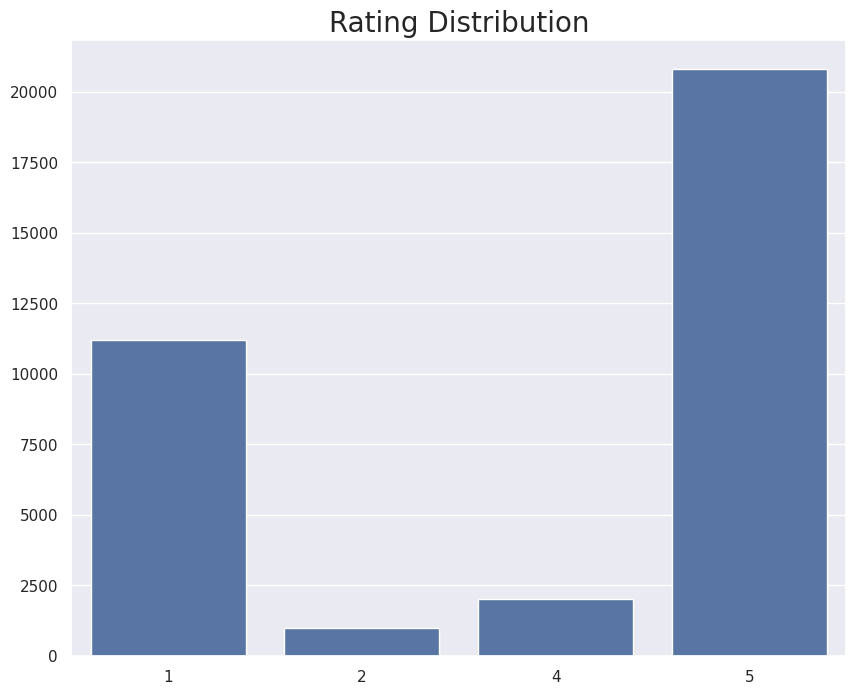

In [23]:
# View Train Rating Distribution
plt.figure(figsize=(10, 8))
plt.title('Rating Distribution', fontsize=20)

rating_distribution = X_train['Rating'].value_counts().sort_values()
sns.barplot(x=list(rating_distribution.keys()),
            y=rating_distribution.values)
display(rating_distribution.sort_values())

,count
Sentiment,
negative,12183
positive,22809


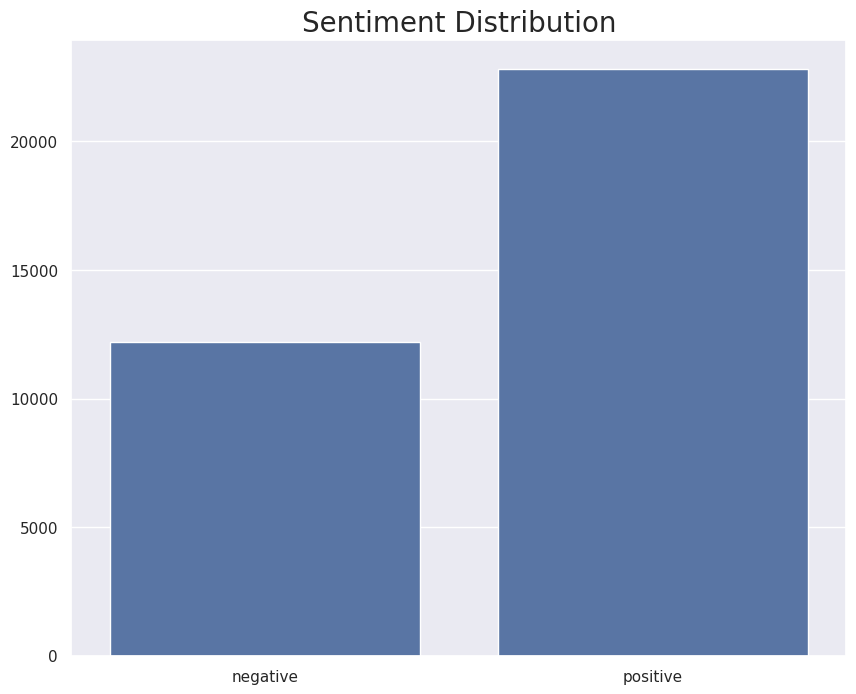

In [24]:
# View Sentiment Distribution
plt.figure(figsize=(10, 8))
plt.title('Sentiment Distribution', fontsize=20)

sentiment_distribution = y_train.value_counts().sort_values()
sns.barplot(x=list(sentiment_distribution.keys()),
            y=sentiment_distribution.values)
display(sentiment_distribution.sort_values())

In [25]:
# randomly draw 46000 examples from each class
df_balanced = pd.concat(
    [X_train, y_train],
    axis=1)


temp_positive = df_balanced[df_balanced.Sentiment == 'positive'].sample(
    n=12000,
    replace=False
)

temp_negative = df_balanced[df_balanced.Sentiment == 'negative'].sample(
    n=12000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced = df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 24000 reviews.


In [26]:
df_balanced['Review_Length'] = df_balanced['Review'].apply(lambda x: len(x.split()))
pos_review_length_avg = df_balanced[df_balanced['Sentiment']== 'positive']['Review_Length'].mean()
neg_review_length_avg = df_balanced[df_balanced['Sentiment']== 'negative']['Review_Length'].mean()
print('Average positive review length: ', pos_review_length_avg)
print('Average negative review length: ', neg_review_length_avg)

Average positive review length:  28.017583333333334
Average negative review length:  109.60616666666667


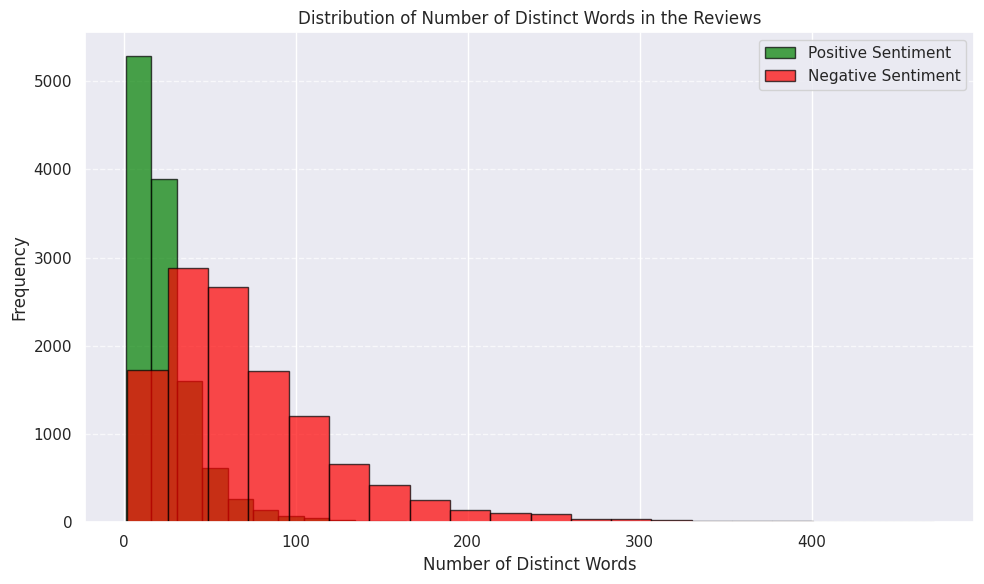

In [27]:
#Distribution of Distinct Words in a Review for Positive vs Negative Reviews
df_balanced['Distinct_Words'] = df_balanced['Review'].apply(lambda x:len(np.unique(x.lower().split())))

# Separate data based on sentiment
positive = df_balanced[df_balanced['Sentiment'] == 'positive']['Distinct_Words']
negative = df_balanced[df_balanced['Sentiment'] == 'negative']['Distinct_Words']

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(positive, bins=20, alpha=0.7, label='Positive Sentiment', color='green', edgecolor='black')
plt.hist(negative, bins=20, alpha=0.7, label='Negative Sentiment', color='red', edgecolor='black')

# Add plot details
plt.title('Distribution of Number of Distinct Words in the Reviews')
plt.xlabel('Number of Distinct Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
df_balanced

,Review,Rating,Sentiment,Review_Length,Distinct_Words
0,"They are bad company, charging £225.00 per mon...",1,negative,171,125
1,I ordered a new router from BT.(hub2). The eng...,1,negative,145,86
2,"It’s been great and more than satisfying, reco...",5,positive,23,21
3,Had broadband for a year all seemed fine\nHave...,1,negative,55,46
4,"Excellent communication, top notch product. Co...",5,positive,11,11
...,...,...,...,...,...
23995,Great price and product. Computer runs so much...,5,positive,10,10
23996,Absolutely terrible. Please don't even go into...,1,negative,109,80
23997,I used a voucher code from Unidays which I tho...,1,negative,276,159
23998,"Really good service, the Phone arrived very qu...",5,positive,18,18


In [29]:
#Transform categorical y variable to be binary numerical format
# (0= negative, positive = 1)
X_train = df_balanced['Review']
y_train = df_balanced['Sentiment']
y_train = np.where(y_train.eq('positive'), 1, 0)

X_val = X_val['Review']
y_val = np.where(y_val.eq('positive'), 1, 0)

X_test = X_test['Review']
y_test = np.where(y_test.eq('positive'), 1, 0)

In [30]:
X_val, y_val

(19770    Virgin media transferred me to 02 at their ins...
 29950    All about the service not, when first installe...
 50382    Excellent engineer\nVery knowledgeable and hel...
 31989    For my parents' broadband: Biggest dog mess of...
 48321    I just bought 3 plugins from plugin boutique a...
                                ...                        
 7813     Always get great value, good quality photos at...
 32872    Absolutely shocking customer service. Been com...
 34753    Great communication - particularly with delive...
 34020    Not received my order and no response from ghd...
 22806    Good knowledge of products. Reliable and promp...
 Name: Review, Length: 11664, dtype: object,
 array([0, 0, 1, ..., 1, 0, 1]))

Data Pre-Processing

In [35]:
#text format lower case; remove stop words; stemmazation


In [31]:
# remove punctuation and other non-letter characters
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))

    return text

X_train

,Review
0,"They are bad company, charging £225.00 per mon..."
1,I ordered a new router from BT.(hub2). The eng...
2,"It’s been great and more than satisfying, reco..."
3,Had broadband for a year all seemed fine\nHave...
4,"Excellent communication, top notch product. Co..."
...,...
23995,Great price and product. Computer runs so much...
23996,Absolutely terrible. Please don't even go into...
23997,I used a voucher code from Unidays which I tho...
23998,"Really good service, the Phone arrived very qu..."


In [32]:
#Apply data preprocessing to all input datasets
X_train = X_train.apply(preprocessor)
X_val = X_val.apply(str).apply(preprocessor)
X_test = X_test.apply(str).apply(preprocessor)


Baseline Models

In [33]:
# construct the pipeline with the procedural steps to
# process the data and cast predictions
pipe = Pipeline([
  ('vec', CountVectorizer(min_df=1000, preprocessor=preprocessor)),
  ('tfid', TfidfTransformer()),
  ('lr', SGDClassifier(loss='log_loss'))
])

# fit the model to the data
model = pipe.fit(X_train, y_train)

# predict sentiment on the test data frame
y_val_pred = model.predict(X_val)

# create the classification report
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4081
           1       0.97      0.92      0.94      7583

    accuracy                           0.93     11664
   macro avg       0.91      0.93      0.92     11664
weighted avg       0.93      0.93      0.93     11664



In [49]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,  BatchNormalization
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
#Baseline Model: Simple neural networks architecture

# Initialize the TF-IDF Vectorizer for data processing
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity

# Fit and transform the reviews into numerical features
X_train_vec = vectorizer.fit_transform(np.array(X_train)).toarray()
X_val_vec = vectorizer.fit_transform(np.array(X_val)).toarray() # transform validation data
X_test_vec = vectorizer.fit_transform(np.array(X_test)).toarray() # transform test data


# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_history = model.fit(X_train_vec, np.array(y_train), epochs=5, batch_size=32,
          validation_data=(X_val_vec, np.array(y_val)))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_vec, np.array(y_val))
print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


test_loss, test_accuracy = model.evaluate(X_test_vec, np.array(y_test))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8290 - loss: 0.3945 - val_accuracy: 0.6670 - val_loss: 0.7037
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9371 - loss: 0.1603 - val_accuracy: 0.6664 - val_loss: 0.7418
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9500 - loss: 0.1327 - val_accuracy: 0.6023 - val_loss: 0.9662
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9550 - loss: 0.1254 - val_accuracy: 0.6148 - val_loss: 0.9884
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9572 - loss: 0.1222 - val_accuracy: 0.5723 - val_loss: 1.1463
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5749 - loss: 1.1472
Val Loss: 1.1463, Val Accuracy: 0.5723
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6310 - loss: 0.9978
Test Loss: 0.9998, Test Accuracy: 0.6289


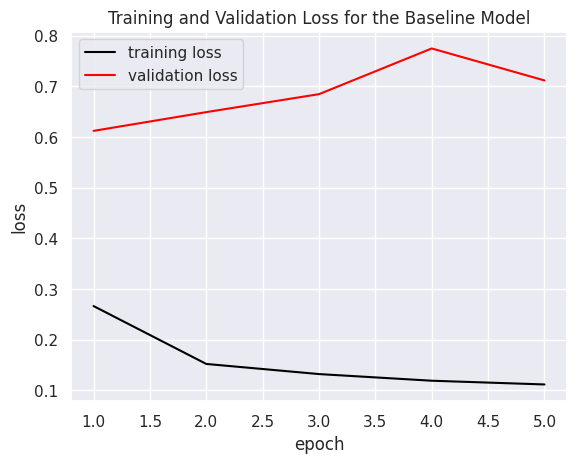

final train loss: 0.11167613
final train accuracy: 0.96112502
final val loss: 0.71175742
final val accuracy: 0.74082649


In [51]:
#Generate plot for loss values for the baseline model
# Plot the loss at each epoch and show final numbers.
# Plot training loss
plt.plot(range(1, len(model_history.history['loss']) + 1),
         model_history.history['loss'], color='black', label='training loss')

#Plot validation loss
plt.plot(range(1, len(model_history.history['val_loss']) + 1),
         model_history.history['val_loss'], color='red', label='validation loss')
plt.title("Training and Validation Loss for the Baseline Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

print('final train loss: %.8f' %model_history.history['loss'][-1])
print('final train accuracy: %.8f' %model_history.history['accuracy'][-1])

print('final val loss: %.8f' %model_history.history['val_loss'][-1])
print('final val accuracy: %.8f' %model_history.history['val_accuracy'][-1])

Model Improvements

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding

In [ ]:
# Model Improvement with Embedding + LSTM model
# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))

# Convert text to sequences
#sequences = tokenizer.texts_to_sequences(np.array(X_train))


# Convert text to numerical feature representation
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)


# Define LSTM neural network model with an embedding layer + Bidirectional LSTM
embedding_dim = 8  # Size of the embedding vectors

# ## build the model
# bi_lstm_model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(
#         input_dim=vocab_size,
#         output_dim=embedding_dim,
#         input_length=max_length,
#         name='embed-layer'),
#     tf.keras.layers.Bidirectional(
#         tf.keras.layers.LSTM(64, return_sequences=True, name='lstm-layer'),
#         name='bidir-lstm'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# #bi_lstm_model.summary()

# ## compile and train:
# # bi_lstm_model.compile(
# #     optimizer=tf.keras.optimizers.Adam(),
# #     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
# #     metrics=['accuracy'])
# bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# bi_lstm_model_history = bi_lstm_model.fit(
#     X_train_padded,
#     validation_data=(X_val_padded, np.array(y_val)),
#     epochs=10)

# ## evaluate on the test data
# test_results = bi_lstm_model.evaluate(X_test_padded)
# print('Test Acc.: {:.2f}%'.format(test_results[1]*100))

bi_lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),  # LSTM layer for sequence modeling
    Bidirectional(LSTM(32, dropout=0.2)),
    Dense(32, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  #binary classification
])


bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
bi_lstm_model_history = bi_lstm_model.fit(np.array(X_train_padded), np.array(y_train), epochs=10, batch_size=32,
          validation_data=(np.array(X_val_padded), np.array(y_val)))

# Evaluate the model
loss, accuracy = bi_lstm_model.evaluate(np.array(X_test), np.array(y_test))
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 705s 933ms/step - accuracy: 0.8486 - loss: 0.3414 - val_accuracy: 0.9514 - val_loss: 0.1326
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 710s 890ms/step - accuracy: 0.9475 - loss: 0.1482 - val_accuracy: 0.9599 - val_loss: 0.1139
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 630s 841ms/step - accuracy: 0.9597 - loss: 0.1214 - val_accuracy: 0.9619 - val_loss: 0.1091
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 654s 872ms/step - accuracy: 0.9567 - loss: 0.1243 - val_accuracy: 0.9494 - val_loss: 0.1322
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 683s 872ms/step - accuracy: 0.9620 - loss: 0.1111 - val_accuracy: 0.9558 - val_loss: 0.1168
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 674s 861ms/step - accuracy: 0.9613 - loss: 0.1062 - val_accuracy: 0.9606 - val_loss: 0.1095
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 673s 849ms/step - accuracy: 0.9511 - loss: 0.1308 - val_accuracy: 0.9533 - val_loss: 0.1374
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 687s 856ms/step - accuracy: 0.9519 -

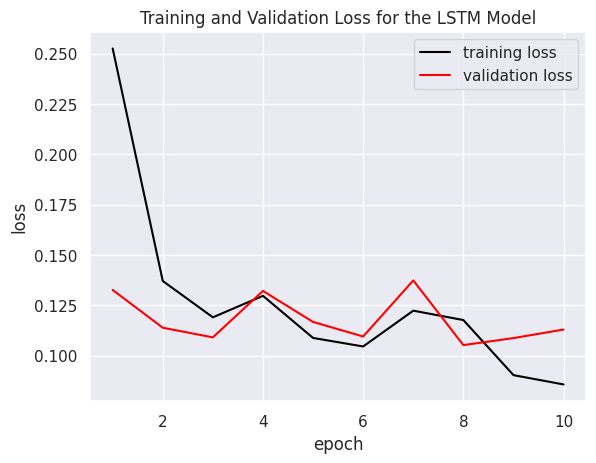

final train loss: 0.086
final train accuracy: 0.970
final val loss: 0.113
final val accuracy: 0.961


In [54]:
#Generate plot for loss values for the baseline model
# Plot the loss at each epoch and show final numbers.
# Plot training loss
plt.plot(range(1, len(bi_lstm_model_history.history['loss']) + 1),
         bi_lstm_model_history.history['loss'], color='black', label='training loss')

#Plot validation loss
plt.plot(range(1, len(bi_lstm_model_history.history['val_loss']) + 1),
         bi_lstm_model_history.history['val_loss'], color='red', label='validation loss')
plt.title("Training and Validation Loss for the LSTM Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

print('final train loss: %.3f' %bi_lstm_model_history.history['loss'][-1])
print('final train accuracy: %.3f' %bi_lstm_model_history.history['accuracy'][-1])

print('final val loss: %.3f' %bi_lstm_model_history.history['val_loss'][-1])
print('final val accuracy: %.3f' %bi_lstm_model_history.history['val_accuracy'][-1])

In [55]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D

In [58]:
#CNN
# Tokenize the text data
vocab_size = 1000  # Vocabulary size
oov_token = "<OOV>"  # Out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

#create the vocabulary list based on reviews
tokenizer.fit_on_texts(np.array(X_train))

# Convert text to sequences
#sequences = tokenizer.texts_to_sequences(np.array(X_train))


# Convert text to numerical feature representation
X_train_sequences = tokenizer.texts_to_sequences(np.array(X_train))
X_val_sequences = tokenizer.texts_to_sequences(np.array(X_val))
X_test_sequences = tokenizer.texts_to_sequences(np.array(X_test))

# Pad sequences to make sure all reviews are the same input length
max_length = 400  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

tf.random.set_seed(1)

# Embed our training vocabulary into 10 dimensions.
# vocab_size_train = len(token_counts) + 2
embedding_dim = 10

# embedding_layer = tf.keras.layers.Embedding(
#     input_dim=vocab_size, output_dim=embedding_dim)

def build_model():
    ''''''
    # clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(1)

    # define model
    model = tf.keras.Sequential()

    ## add embedding layer ##
    #########################
    # (this is our imput layer)
    # embeddings will be learned during training
    # the weights for the embeddings are randomly initialized (just like any other layer!)
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=10,
        input_length=400, #limits length of sentence to 100 tokens
        name="embedding")
        ),

    ## first convolution ##
    #######################
    model.add(Conv1D(
        filters=128,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## second convolution ##
    ########################
    model.add(Conv1D(
        filters=64,
        kernel_size=4,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## third convolution ##
    #######################
    model.add(Conv1D(
        filters=32,
        kernel_size=5,
        padding='same',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    # add maxpooling
    model.add(MaxPooling1D(pool_size=2))

    ## average embeddings ##
    ########################
    model.add(GlobalAveragePooling1D()),

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))



    ## add final dense (output) layer ##
    ####################################
    model.add(Dense(1, activation='sigmoid'))

    # save embeddings before training
    #embeddings_untrained = model.get_layer('embedding').get_weights()[0]

    # print model summary
    model.summary()

    return model


model_cnn = build_model()

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

tf.random.set_seed(1)
np.random.seed(1)
history = model_cnn.fit(
    np.array(X_train_padded), np.array(y_train), epochs=10,
          validation_data=(np.array(X_val_padded), np.array(y_val)))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 128ms/step - accuracy: 0.8192 - loss: 0.4566 - val_accuracy: 0.9199 - val_loss: 0.3832
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.9125 - loss: 0.2558 - val_accuracy: 0.9320 - val_loss: 0.3362
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.9351 - loss: 0.1969 - val_accuracy: 0.9534 - val_loss: 0.2120
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.9480 - loss: 0.1505 - val_accuracy: 0.9602 - val_loss: 0.1601
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.9563 - loss: 0.1312 - val_accuracy: 0.9631 - val_loss: 0.1563
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.9624 - loss: 0.1152 - val_accuracy: 0.9632 - val_loss: 0.1428
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.9641 - loss: 0.1118 - val_accuracy: 0.9603 - val_loss: 0.1481
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.9652 - los

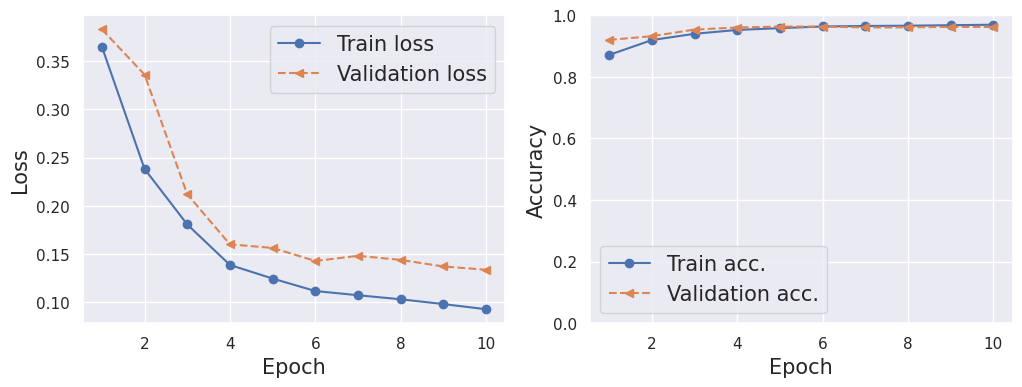

In [59]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_ylim(0,1)
plt.show();

EXTRA

In [52]:
X_train_padded

array([[ 10,  43, 284, ...,   0,   0,   0],
       [  4,  93,   6, ...,   0,   0,   0],
       [  8,  49,  36, ...,   0,   0,   0],
       ...,
       [  4, 203,   6, ...,   0,   0,   0],
       [140,  69,  23, ...,   0,   0,   0],
       [  2, 467, 149, ...,   0,   0,   0]], dtype=int32)

In [48]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True, dropout=0.2),  # LSTM layer for sequence modeling
    LSTM(32, dropout=0.2),
    Dense(32, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  #binary classification
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
vocab_size_train = 1002
embedding_dim = 10

model = tf.keras.Sequential()
# add embedding layer (this is our imput layer)
# embeddings will be learned during training
# the weights for the embeddings are randomly initialized (just like any other layer!)
model.add(Embedding(
    vocab_size_train,
    embedding_dim,
    #input_length=100, #limits length of sentence to 100 tokens
    name="embedding")
    ),


# average over the emedding dimension, so each review is represented by a 1d vector of size embedding_dimension
model.add(GlobalAveragePooling1D()),

# add a Dense layer of dimension 16
model.add(Dense(16, activation='relu')),

# add Dropout for regularization
model.add(Dropout(0.5))

# add last layer (binary classification task)
model.add(Dense(1, activation='sigmoid'))


# save embeddings before training
#embeddings_untrained = model.get_layer('embedding').get_weights()[0]

# print model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#kaggle comp method
def encode_labels(labels, label_depth=2):
    return tf.one_hot(labels, depth=label_depth).numpy()

def create_pipeline(x_df,y_df, preprocessor, batch_size=32, shuffle=False, cache=None, prefetch=False):
    '''
    Generates an input pipeline using the tf.data API given a Pandas DataFrame and image loading function.

    @params
        - df: (pd.DataFrame) -> DataFrame containing texts and labels
        - preprocessor (function) -> preprocessor used to preprocess texts
        - batch_size: (int) -> size for batched (default=32)
        - shuffle: (bool) -> condition for data shuf
        a, data is not cached when None (default=None)
        - prefetch: (bool) -> condition for prefeching data, data is prefetched when True (default=False)

    @returns
        - dataset: (tf.data.Dataset) -> dataset input pipeline used to train a TensorFlow model
    '''
    # Get image paths and labels from DataFrame
    reviews = np.array(x_df.apply(preprocessor)).astype(str)
    #ratings = encode_labels(y_df.astype(np.float32))
    AUTOTUNE = tf.data.AUTOTUNE
    ratings = y_df

    # Create dataset with raw data from DataFrame
    ds = tf.data.Dataset.from_tensor_slices((reviews, ratings))

    # Apply shuffling based on condition
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)

    # Apply batching
    ds = ds.batch(batch_size)

    # # Apply caching based on condition
    # # Note: Use cache in memory (cache='') if the data is small enough to fit in memory!!!
    # if cache != None:
    #     ds = ds.cache(cache)

    # # Apply prefetching based on condition
    # # Note: This will result in memory trade-offs
    # if prefetch:
    #     ds = ds.prefetch(buffer_size=AUTOTUNE)

    ds_vectorized = ds.cache().prefetch(buffer_size=AUTOTUNE)
    # X_val_vectorized = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
    # X_test_vectorized = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


    # Return the dataset
    return ds_vectorized

In [ ]:
# Create train input data pipeline
train_ds = create_pipeline(
    X_train,y_train, preprocessor,
    batch_size=32,
    shuffle=False, prefetch=True
)

# Create validation input data pipeline
val_ds = create_pipeline(
    X_val,y_val, preprocessor,
    batch_size=32,
    shuffle=False, prefetch=False
)

In [ ]:
# View string representation of datasets
print('========================================')
print('Train Input Data Pipeline:\n\n', train_ds)
print('========================================')
print('Validation Input Data Pipeline:\n\n', val_ds)
print('========================================')

Train Input Data Pipeline:

 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Validation Input Data Pipeline:

 <_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
#HW 9 baseline
X_train_one_hot = tf.keras.utils.to_categorical(train_ds)

TypeError: int() argument must be a string, a bytes-like object or a real number, not '_PrefetchDataset'

In [ ]:
def build_onehot_model(average_over_positions=False):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation="sigmoid"         # sigmoid activation for binary classification
  ))

  model.compile(loss='binary_crossentropy',   # this is a classification task
                optimizer='adam',             # fancy optimizer
                metrics=['accuracy'])

  return model

In [ ]:
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.ylim(0,1)
  plt.legend()
  plt.show()

In [ ]:
tf.random.set_seed(0)
model1 = build_onehot_model()

# Fit the model.
history1 = model1.fit(
  x = X_train_one_hot,  # one-hot training data
  y = Y_train,          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

model1.summary()
# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history1 = pd.DataFrame(history1.history)
plot_history(history1)

In [ ]:
#alt method
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=4)

model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

array(['they are bad company charging 225 00 per month i moved to another company like for like 10 00 ok i left them i asked why is it so costly they can t tell me 3 weeks later passed to zinc a credit company they were nice people to talk to but at the time all this taking place i was trying hard to explain to vodafone though breathing problems i had my temper was short a deal was set by zinc but vodafone put more marks on credit up to date zinc told me why my phone bill was high 4 phone numbers on it i only use 1 as off yesterday phone call to vodafone i was calm and collected pills for breathing helped i spoke with a girl called veronica that was saturday 30th she said she would sort it out monday 2 we see i told my friends about vodafone they did not believe me till i showed all letters any questions i will answer really rating would be 5',
       'i ordered a new router from bt hub2 the engineer came to install it it precisely told him where to put it and where to connect the cabl

In [ ]:
# predict sentiment on the test data frame
y_test_pred = model.predict(X_test)

# create the classification report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4028
           1       0.94      0.90      0.92      7637

    accuracy                           0.90     11665
   macro avg       0.88      0.90      0.89     11665
weighted avg       0.90      0.90      0.90     11665



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

Baseline Model

In [ ]:
#baseline model 1: majority classifier
class_counts = Y_train['cocoa_percent_cat'].value_counts()
majority_class_index = class_counts.idxmax()
print("Majority class: ", majority_class_index)
print("Class counts: ", class_counts)


#accuracy of baseline model
majority_clf_accuracy = class_counts.max()/len(Y_train)
print("baseline model Training Accuracy: ", majority_clf_accuracy)


# Function to compute Cross-Entropy Loss
def compute_log_loss(y_true, pred_prob):
    y_true_dense = tf.keras.utils.to_categorical(y_true)
    cross_entropy_values = - np.sum(y_true_dense * np.log(pred_prob), axis=1)
    loss = np.mean(cross_entropy_values)
    return loss

train_loss = compute_log_loss(Y_train,np.array([0.02,0.88,0.10]))
val_loss = compute_log_loss(Y_val, np.array([0.02,0.88,0.10]))
print("Training loss: ", train_loss)
print("Validation loss: ", val_loss)

In [ ]:
#Baseline Model 2- Logistic Regression with One-Hot Encodings (HW#9)
def build_onehot_model(average_over_positions=False):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation="sigmoid"         # sigmoid activation for binary classification
  ))

  model.compile(loss='binary_crossentropy',   # this is a classification task
                optimizer='adam',             # fancy optimizer
                metrics=['accuracy'])

  return model

def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.ylim(0,1)
  plt.legend()
  plt.show()


tf.random.set_seed(0)
model1 = build_onehot_model()

# Fit the model.
X_train_one_hot = tf.keras.utils.to_categorical(X_train_vectorized)
history1 = model1.fit(
  x = X_train_one_hot,  # one-hot training data
  y = y_train,          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

model1.summary()
# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history1 = pd.DataFrame(history1.history)
plot_history(history1)

history1


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
X_train_vectorized

<tf.Tensor: shape=(22000, 6), dtype=int64, numpy=
array([[   2,  345,   18,   34,  107,    3],
       [  34,  485,   16,    2, 5847,    5],
       [ 927,   14,    2,   29,   16,  276],
       ...,
       [  41,    2, 1406,    8,  521,  301],
       [  34,  145,   21,    3,  101,   33],
       [  32,  246, 1313, 4025,   14,   22]])>

Model Improvements

In [ ]:
# Model 2: Logistic Regression with Embeddings (HW#9)
def build_embeddings_model(average_over_positions=False,
                           vocab_size=1000,
                           sequence_length=20,
                           embedding_dim=2):
  """Build a tf.keras model using embeddings."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=sequence_length)
  )

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

model2 = build_embeddings_model(average_over_positions=True,
                               vocab_size=1000,
                               sequence_length=20,
                               embedding_dim=2)
history2 = model2.fit(
  x = X_train_reduced,  # our sparse padded training data
  y = Y_train,          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

model2.summary()

history2 = pd.DataFrame(history2.history)
plot_history(history2)

array([0, 1])

In [ ]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Model 3: Text Sentiment Classification
# https://colab.research.google.com/drive/12pxBkaDRZWrgSemaiuDg8186_0pBpF3H?usp=sharing#scrollTo=Mr0GP-cQ-llN

embedding_dim = 8
max_features = 10000
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

model.summary()

model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


epochs = 10
history = model.fit(
    train_ds,
    #validation_data=val_ds,
    epochs=epochs)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ValueError: Input 0 of layer "global_average_pooling1d_2" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (8,)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
#Model 4: Sequence modeling embeddings
# https://colab.research.google.com/drive/1Wqbsh-C7eXAzcwtpLWcy21Tbsr_TpW3U?usp=sharing#scrollTo=677b2920


In [ ]:
#Model 5: Text Classification with RNN and Keras (research Transformers/LSTM) model
# RNN: https://colab.research.google.com/drive/1enkaLmUYnVD6C-XyXxpzYZ0HErLoA3py?usp=sharing#scrollTo=uC25Lu1Yvuqy
# Transfomers: https://www.tensorflow.org/text/tutorials/transformer



In [ ]:
#Model 6: CNN (Week 10 notebook)

Hyperparameter Tuning